# Imports and Read-ins

In [133]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime as dt
import re

In [134]:
members = pd.read_csv('data/NSS_GreatCare_Members.csv')
admissions = pd.read_csv('data/NSS_Hospital_Inpatient_Admissions.csv')
pcp = pd.read_csv('data/NSS_PrimaryCare_Office_Visits.csv')

C:\Users\jrior\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [135]:
members.head()

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,...,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-04-11 00:00:00+00
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,...,0,0,0,0,1,0,0,0,2012-12-10 00:00:00+00,2013-01-01 00:00:00+00
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,...,0,0,0,0,0,0,0,0,2015-04-18 00:00:00+00,2015-05-18 00:00:00+00
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2010-01-01 00:00:00+00,2010-04-09 00:00:00+00
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2012-08-01 00:00:00+00,2012-10-02 00:00:00+00


In [136]:
admissions[['Encounter Start Date', 'Encounter End Date']].head()

,Encounter Start Date,Encounter End Date
0,2013-01-12,2013-01-14
1,2014-01-05,2014-01-12
2,2012-06-13,2012-06-21
3,2012-12-06,2012-12-09
4,2015-03-11,2015-03-14


In [137]:
pcp.head()

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.487857e+09,1.043427e+09,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1.528031e+09,1.902803e+09,1.528031e+09,1.043427e+09,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.477579e+09,1.043427e+09,2014-08-31,0,1,0,0,NaN
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,DS1|NPI|1821178088,DS1|NPI|1821178088,DS1|NPI|1407058787,DS1|NPI|1104842020,DS1|1,DS1|5047W,1.821178e+09,1.104842e+09,1.821178e+09,1.407059e+09,2013-06-17,0,1,1,1,NaN
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,DS1|NPI|1609004191,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1.609004e+09,1.184723e+09,2016-09-04,0,1,0,0,NaN


# Getting the House in Order

### Convert date columns to datetime dtype

In [138]:
members['Patient Date of Birth'] = pd.to_datetime(members['Patient Date of Birth'], format='%Y-%m-%d')
members['Period Start Date'] = pd.to_datetime(members['Period Start Date'], format='%Y-%m-%d')
members['Period End Date'] = pd.to_datetime(members['Period End Date'], format='%Y-%m-%d')

In [139]:
admissions['Encounter Start Date'] = pd.to_datetime(admissions['Encounter Start Date'], format='%Y-%m-%d')
admissions['Encounter End Date'] = pd.to_datetime(admissions['Encounter End Date'], format='%Y-%m-%d')

In [140]:
pcp['Encounter Date'] = pd.to_datetime(pcp['Encounter Date'], format='%Y-%m-%d')
pcp['Service Provider NPI'] = pcp['Service Provider NPI'].astype("string").str.replace(".0","").astype("category")
pcp['Provider Group NPI'] = pcp['Provider Group NPI'].astype("string").str.replace(".0","").astype("category")

<ipython-input-140-521b44910019>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  pcp['Service Provider NPI'] = pcp['Service Provider NPI'].astype("string").str.replace(".0","").astype("category")
<ipython-input-140-521b44910019>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pcp['Provider Group NPI'] = pcp['Provider Group NPI'].astype("string").str.replace(".0","").astype("category")


In [141]:
admissions['Facility Provider NPI'] = admissions['Facility Provider NPI'].astype("string").str.replace(".0","").astype("category")
admissions['Attending Provider NPI'] = admissions['Attending Provider NPI'].astype("string").str.replace(".0","").astype("category")

<ipython-input-141-1f0ce5460cee>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  admissions['Facility Provider NPI'] = admissions['Facility Provider NPI'].astype("string").str.replace(".0","").astype("category")
<ipython-input-141-1f0ce5460cee>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  admissions['Attending Provider NPI'] = admissions['Attending Provider NPI'].astype("string").str.replace(".0","").astype("category")


### Check info on each dataframe after type conversions

In [142]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61519 entries, 0 to 61518
Data columns (total 63 columns):
 #   Column                                                           Non-Null Count  Dtype              
---  ------                                                           --------------  -----              
 0   Patient ID                                                       61519 non-null  object             
 1   Primary Plan ID                                                  61519 non-null  object             
 2   Primary Payor ID                                                 61519 non-null  object             
 3   Is Patient Alive                                                 61519 non-null  int64              
 4   Patient Age Integer                                              61519 non-null  int64              
 5   Patient Date of Birth                                            61519 non-null  datetime64[ns]     
 6   Patient ZIP Code 5-Digit              

In [143]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6213 entries, 0 to 6212
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Encounter ID                                         6213 non-null   object        
 1   Patient ID                                           6213 non-null   object        
 2   Encounter Primary Payor ID                           6213 non-null   object        
 3   Encounter Primary Plan ID                            6213 non-null   object        
 4   Facility Provider ID                                 6213 non-null   object        
 5   Attending Provider ID                                5884 non-null   object        
 6   Attending Provider NPI                               5884 non-null   category      
 7   Facility Provider NPI                                6213 non-null   category      
 8 

In [144]:
pcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231373 entries, 0 to 231372
Data columns (total 18 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   Encounter ID                                   231373 non-null  object        
 1   Patient ID                                     231373 non-null  object        
 2   Service Provider ID                            230599 non-null  object        
 3   Attending Provider ID                          39644 non-null   object        
 4   Provider Group Provider ID                     227644 non-null  object        
 5   Facility Provider ID                           39756 non-null   object        
 6   Encounter Primary Payor ID                     231373 non-null  object        
 7   Encounter Primary Plan ID                      231373 non-null  object        
 8   Attending Provider NPI                      

### Test merging dataframes (will actually want to take only select columns)

In [145]:
#testing df merge: members and admissions

members_adm = pd.merge(admissions, members, how = 'left', on = 'Patient ID')
members_adm.head()

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,14171523,168389,2013-01-12,2013-01-14,...,0,0,0,0,0,0,0,0,2014-01-01 00:00:00+00:00,2014-02-16 00:00:00+00:00
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1669599197,123315,2014-01-05,2014-01-12,...,0,0,0,0,0,0,0,0,2014-01-01 00:00:00+00:00,2014-01-12 00:00:00+00:00
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,178511,123315,2012-06-13,2012-06-21,...,0,0,0,0,0,0,0,0,2011-01-01 00:00:00+00:00,2011-01-07 00:00:00+00:00
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1087,14255839,2012-12-06,2012-12-09,...,0,0,0,0,0,0,0,0,2014-02-01 00:00:00+00:00,2014-05-23 00:00:00+00:00
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,151458,1992818256,2015-03-11,2015-03-14,...,0,0,0,0,0,0,0,0,2014-01-01 00:00:00+00:00,2014-08-12 00:00:00+00:00


# Problem 1: 30-day Readmission Rate

## Preparation: create patient_adm_ct

In [146]:
#count how many visits each patient has had up to and including current visit
admissions['patient_adm_ct'] = admissions.groupby('Patient ID')['Encounter Start Date'].transform('rank', method = 'first')

## Method 1: for-loop over iterrows()
### This works, but don't use it

In [147]:
days_till_readmission = []
for index, row in admissions.iterrows():
    if row['patient_adm_ct'] == 1:
        readm_time = pd.to_datetime(None)
    else:
        readm_time = (row['Encounter Start Date'] - admissions[(admissions['Patient ID'] == row['Patient ID'])
                                &
                                (admissions['patient_adm_ct'] == row['patient_adm_ct']-1)]['Encounter End Date']).dt.days.values[0]
    days_till_readmission.append(readm_time)
    
days_till_readmission    
# admissions['days_till_readmission'] = days_till_readmission
# admissions['days_till_readmission'] = admissions['days_till_readmission'].dt.days
# print(admissions['days_till_readmission'])


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 135,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 496,
 47,
 None,
 None,
 285,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 126,
 None,
 31,
 0,
 5,
 47,
 25,
 28,
 73,
 27,
 27,
 4,
 None,
 None,
 None,
 None,
 None,
 None,
 4,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 0,
 None,
 None,
 674,
 None,
 78,
 -19,
 -2,
 17,
 None,
 None,
 None,
 None,
 151,
 19,
 222,
 0,
 None,
 None,
 116,
 95,
 105,
 None,
 None,
 None,
 111,
 125,
 None,
 None,
 None,
 0,
 None,
 None,
 None,
 None,
 301,
 None,
 None,
 None,
 47,
 None,
 None,
 None,
 None,
 139,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 590,
 None,
 None,
 None,
 364,
 1,
 None,
 70,
 157,
 38,
 47,
 6,
 None,
 647,
 None,
 None,
 None,
 None,
 None,
 None,
 10,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 No

## Method 2: self-join on patient id and patient_adm_ct
### Use this

In [148]:
#Create new dataframe from admissions that only has three columns
readmits = admissions[['Patient ID', 'patient_adm_ct', 'Encounter End Date']]

#Add 1 to all patient_adm_ct. This transformation allows us to put the discharge date from the patient's previous hospital
#visit on the same line as their current visit, thus allowing us to calculate a difference in dates.
readmits['patient_adm_ct'] += 1

#merge the two dataframes on patient id and the transformed patient_adm_ct
readmissions = pd.merge(admissions, readmits, how = 'left', on = ['Patient ID', 'patient_adm_ct'], suffixes = ('', ' Last'))

#calculate the days of difference between current encounter's start date and the last encounter's end date
readmissions['Days Between Readmission'] = readmissions['Encounter Start Date'] - readmissions['Encounter End Date Last']

<ipython-input-148-18f70f3dc68b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmits['patient_adm_ct'] += 1


## Calculations

In [149]:
readmissions['Under 30 Days'] = (readmissions['Days Between Readmission'] >= dt.timedelta(days = 0)) & (readmissions['Days Between Readmission'] <= dt.timedelta(days = 30))

In [150]:
readmissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,patient_adm_ct,Encounter End Date Last,Days Between Readmission,Under 30 Days
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,14171523,168389,2013-01-12,2013-01-14,...,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,1.0,NaT,NaT,False
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1669599197,123315,2014-01-05,2014-01-12,...,Compression of brain,NaN,NaN,0,46465.40,250.0,1.0,NaT,NaT,False
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,178511,123315,2012-06-13,2012-06-21,...,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,1.0,NaT,NaT,False
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1087,14255839,2012-12-06,2012-12-09,...,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,1.0,NaT,NaT,False
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,151458,1992818256,2015-03-11,2015-03-14,...,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0,1.0,NaT,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,17043417,1689772592,2015-02-06,2015-02-11,...,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,1.0,NaT,NaT,False
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1215968474,14255839,2014-08-07,2014-08-10,...,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,1.0,NaT,NaT,False
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1861831836,168981,2015-11-21,2015-11-23,...,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,1.0,NaT,NaT,False
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,17544516,168981,2015-11-24,2015-11-27,...,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,2.0,2015-11-23,1 days,True


In [151]:
#First pass at under-30-day rate.
under_30_d_rate = sum(readmissions['Under 30 Days'])/len(readmissions.index)
print(round(under_30_d_rate*100,2), '% readmitted under 30 days')

11.27 % readmitted under 30 days


In [152]:
#checking my work
readmissions[readmissions['patient_adm_ct']>= 2].count()
readmissions['patient_adm_ct'].unique()
readmissions.groupby(['Patient ID', 'patient_adm_ct']).ngroups

6213

### Mean days between release and readmission

In [153]:
#mean readmission time
readmissions['Days Between Readmission'].mean()

Timedelta('104 days 20:28:34.285714286')

### 30-day readmission rates by month

    Encounter Month  Encounters Count  Under 30 Days Count  u30d_rate
0        1996-10-31                 1                    0        0.0
1        1996-11-30                 0                    0        NaN
2        1996-12-31                 0                    0        NaN
3        1997-01-31                 0                    0        NaN
4        1997-02-28                 0                    0        NaN
..              ...               ...                  ...        ...
266      2018-12-31                 0                    0        NaN
267      2019-01-31                 1                    0        0.0
268      2019-02-28                 4                    0        0.0
269      2019-03-31                 0                    0        NaN
270      2019-04-30                 2                    0        0.0

[271 rows x 4 columns]


[(14244.0, 18426.8)]

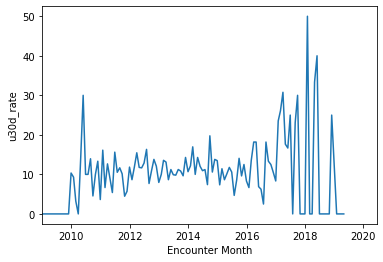

In [154]:
monthly_u30_readm = readmissions.groupby(pd.Grouper(key = 'Encounter Start Date',freq='M'))['Under 30 Days'].sum()
monthly_u30_readm = pd.DataFrame({'Encounter Month':monthly_u30_readm.index, 'Under 30 Days Count':monthly_u30_readm.values})


monthly_encounters = readmissions.groupby(pd.Grouper(key = 'Encounter Start Date',freq='M'))['Encounter ID'].count()
monthly_encounters = pd.DataFrame({'Encounter Month': monthly_encounters.index, 'Encounters Count': monthly_encounters.values})

monthly_u30_rates = pd.merge(monthly_encounters, monthly_u30_readm, how = 'inner')

monthly_u30_rates['u30d_rate'] = 100*monthly_u30_rates['Under 30 Days Count'] / monthly_u30_rates['Encounters Count']

print(monthly_u30_rates)

g = sns.lineplot(x = 'Encounter Month', y = 'u30d_rate', data = monthly_u30_rates)
g.set(xlim = (pd.to_datetime('2008-12-31'),None))

In [155]:
#Investigative: looks like there's one Encounter for 1996, and everything else is 2009 and later.
readmissions.groupby(pd.Grouper(key = 'Encounter Start Date',freq='Y'))['Encounter ID'].count()

Encounter Start Date
1996-12-31       1
1997-12-31       0
1998-12-31       0
1999-12-31       0
2000-12-31       0
2001-12-31       0
2002-12-31       0
2003-12-31       0
2004-12-31       0
2005-12-31       0
2006-12-31       0
2007-12-31       0
2008-12-31       0
2009-12-31      37
2010-12-31     425
2011-12-31     808
2012-12-31    1163
2013-12-31    1200
2014-12-31    1236
2015-12-31     785
2016-12-31     367
2017-12-31     135
2018-12-31      49
2019-12-31       7
Freq: A-DEC, Name: Encounter ID, dtype: int64

## Method 2 Alternative: Truth values assigned to original admission rather than readmission line

In [156]:
#Create new dataframe from admissions that only has three columns
readmits2 = admissions[['Patient ID', 'patient_adm_ct', 'Encounter Start Date']]

#Add 1 to all patient_adm_ct. This transformation allows us to put the discharge date from the patient's previous hospital
#visit on the same line as their current visit, thus allowing us to calculate a difference in dates.
readmits2['patient_adm_ct'] -= 1

#merge the two dataframes on patient id and the transformed patient_adm_ct
readmissions2 = pd.merge(admissions, readmits2, how = 'left', on = ['Patient ID', 'patient_adm_ct'], suffixes = ('', ' Next'))

#calculate the days of difference between current encounter's start date and the last encounter's end date
readmissions2['Days Until Readmission'] = readmissions2['Encounter Start Date Next'] - readmissions2['Encounter End Date']

#create boolean 'Under 30 Days'
readmissions2['Under 30 Days'] = (readmissions2['Days Until Readmission'] >= dt.timedelta(days = 0)) & (readmissions2['Days Until Readmission'] <= dt.timedelta(days = 30))

#Get 30-day readmission rate
#First pass at under-30-day rate.
under_30_d_rate2 = sum(readmissions2['Under 30 Days'])/len(readmissions2.index)
print(round(under_30_d_rate2*100,2), '% readmitted under 30 days')

11.27 % readmitted under 30 days


<ipython-input-156-4284a93c5a60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmits2['patient_adm_ct'] -= 1


    Encounter Month  Encounters Count  Under 30 Days Count  u30d_rate
0        2009-11-30                 2                    0   0.000000
1        2009-12-31                26                    6  23.076923
2        2010-01-31                45                    2   4.444444
3        2010-02-28                30                    0   0.000000
4        2010-03-31                31                    3   9.677419
..              ...               ...                  ...        ...
110      2019-01-31                 1                    0   0.000000
111      2019-02-28                 4                    0   0.000000
112      2019-03-31                 0                    0        NaN
113      2019-04-30                 1                    0   0.000000
114      2019-05-31                 1                    0   0.000000

[115 rows x 4 columns]


[(14244.0, 18220.45)]

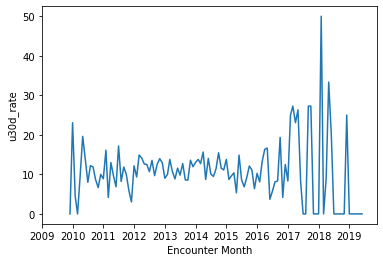

In [157]:
monthly_u30_readm2 = readmissions2.groupby(pd.Grouper(key = 'Encounter End Date',freq='M'))['Under 30 Days'].sum()
monthly_u30_readm2 = pd.DataFrame({'Encounter Month':monthly_u30_readm2.index, 'Under 30 Days Count':monthly_u30_readm2.values})


monthly_encounters2 = readmissions2.groupby(pd.Grouper(key = 'Encounter End Date',freq='M'))['Encounter ID'].count()
monthly_encounters2 = pd.DataFrame({'Encounter Month': monthly_encounters2.index, 'Encounters Count': monthly_encounters2.values})

monthly_u30_rates2 = pd.merge(monthly_encounters2, monthly_u30_readm2, how = 'inner')

monthly_u30_rates2['u30d_rate'] = 100*monthly_u30_rates2['Under 30 Days Count'] / monthly_u30_rates2['Encounters Count']

print(monthly_u30_rates2)

g = sns.lineplot(x = 'Encounter Month', y = 'u30d_rate', data = monthly_u30_rates2)
g.set(xlim = (pd.to_datetime('2008-12-31'),None))

# Problem 2: 7-day PCP Rate

## Merge readmissions and pcp, then clean until at most 1 pcp visit per hospital visit

In [158]:
#reduce pcp to relevant columns
pcp2 = pcp[['Encounter ID','Patient ID','Service Provider NPI','Provider Group NPI','Encounter Date']]                                                                     

#merger readmissions with pcp2
readm_pcp = pd.merge(readmissions, pcp2, how = 'left', on = 'Patient ID', suffixes = ('', ' pcp'))

#create timedelta column between hospital release and PCP visit (will have negatives)
readm_pcp['Hospital to PCP Days'] = readm_pcp['Encounter Date'] - readm_pcp['Encounter End Date']

#cut out all rows with negative time in Hospital to PCP Days, but keep na rows (people who never saw PCP)
readm_pcp = readm_pcp[(readm_pcp['Hospital to PCP Days'] >= dt.timedelta(days = 0)) | (readm_pcp['Hospital to PCP Days'].isnull())]

#Keep people who never saw PCP and rows where Hospital to PCP Days is minimized by Patient ID and patient_adm_ct
readm_pcp = readm_pcp[readm_pcp['Hospital to PCP Days'].isnull() 
                      | 
                      (readm_pcp['Hospital to PCP Days'] == readm_pcp.groupby(['Patient ID', 'patient_adm_ct'])['Hospital to PCP Days'].transform('min'))]

#create boolean column for PCP visits within 7 days
readm_pcp['PCP Under 7 Days'] = readm_pcp['Hospital to PCP Days'] <= dt.timedelta(days = 7)

#take a peak
readm_pcp

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,patient_adm_ct,Encounter End Date Last,Days Between Readmission,Under 30 Days,Encounter ID pcp,Service Provider NPI,Provider Group NPI,Encounter Date,Hospital to PCP Days,PCP Under 7 Days
10,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,14171523,168389,2013-01-12,2013-01-14,...,1.0,NaT,NaT,False,COV|PCSL|DS1|10033|P|711310|1043427248|1,161996,43427248,2014-02-16,398 days,False
17,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1669599197,123315,2014-01-05,2014-01-12,...,1.0,NaT,NaT,False,COV|PBSL|DS1|10043|P|538933|1043427248|1|SHIFTED,1619199791,43427248,2014-01-12,0 days,True
28,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,178511,123315,2012-06-13,2012-06-21,...,1.0,NaT,NaT,False,COV|PBSL|DS1|10073|P|301709|1043427248|1|SHIFTED,16593921,43427248,2012-06-27,6 days,True
50,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1087,14255839,2012-12-06,2012-12-09,...,1.0,NaT,NaT,False,COV|PCSL|DS1|10101|P|1189971|1043427248|1,19525383,43427248,2012-12-12,3 days,True
61,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,151458,1992818256,2015-03-11,2015-03-14,...,1.0,NaT,NaT,False,COV|PCSL|DS1|10118|P|486026|1043427248|1,1316361942,43427248,2015-11-04,235 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44071,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,17043417,1689772592,2015-02-06,2015-02-11,...,1.0,NaT,NaT,False,COV|PCSL|DS1|9979|P|281365|1477666352|1,17277995,1477666352,2015-02-15,4 days,True
44074,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1215968474,14255839,2014-08-07,2014-08-10,...,1.0,NaT,NaT,False,COV|PCSL|DS1|9981|P|1094367|1043427248|1,1992932388,43427248,2014-08-11,1 days,True
44085,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1861831836,168981,2015-11-21,2015-11-23,...,1.0,NaT,NaT,False,COV|PCSL|DS1|9994|P|1238517|1407058787|2,1487734547,158787,2015-12-05,12 days,False
44093,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,17544516,168981,2015-11-24,2015-11-27,...,2.0,2015-11-23,1 days,True,COV|PCSL|DS1|9994|P|1238517|1407058787|2,1487734547,158787,2015-12-05,8 days,False


In [159]:
# THIS CODE IS FOR CHECKING AND DATA CLEANING
# print(round(sum(readm_pcp['PCP Under 7 Days'])*100/len(readmissions), 2), '% see PCP within 7 days of hospital release.')
# sum(readm_pcp['PCP Under 7 Days'])

In [160]:
#looking at only the rows where patients did see PCP within 7 days
readm_pcp_u7d = readm_pcp[readm_pcp['PCP Under 7 Days']]

In [161]:
# merge to new ream_pcp dataframe, fill NAs with False
readm_pcp_new = pd.merge(readmissions, readm_pcp, how = 'left')
readm_pcp_new['PCP Under 7 Days'] = readm_pcp_new['PCP Under 7 Days'].fillna(False)

In [162]:
readm_pcp_new

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,patient_adm_ct,Encounter End Date Last,Days Between Readmission,Under 30 Days,Encounter ID pcp,Service Provider NPI,Provider Group NPI,Encounter Date,Hospital to PCP Days,PCP Under 7 Days
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,14171523,168389,2013-01-12,2013-01-14,...,1.0,NaT,NaT,False,COV|PCSL|DS1|10033|P|711310|1043427248|1,161996,43427248,2014-02-16,398 days,False
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1669599197,123315,2014-01-05,2014-01-12,...,1.0,NaT,NaT,False,COV|PBSL|DS1|10043|P|538933|1043427248|1|SHIFTED,1619199791,43427248,2014-01-12,0 days,True
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,178511,123315,2012-06-13,2012-06-21,...,1.0,NaT,NaT,False,COV|PBSL|DS1|10073|P|301709|1043427248|1|SHIFTED,16593921,43427248,2012-06-27,6 days,True
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1087,14255839,2012-12-06,2012-12-09,...,1.0,NaT,NaT,False,COV|PCSL|DS1|10101|P|1189971|1043427248|1,19525383,43427248,2012-12-12,3 days,True
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,151458,1992818256,2015-03-11,2015-03-14,...,1.0,NaT,NaT,False,COV|PCSL|DS1|10118|P|486026|1043427248|1,1316361942,43427248,2015-11-04,235 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,17043417,1689772592,2015-02-06,2015-02-11,...,1.0,NaT,NaT,False,COV|PCSL|DS1|9979|P|281365|1477666352|1,17277995,1477666352,2015-02-15,4 days,True
6210,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1215968474,14255839,2014-08-07,2014-08-10,...,1.0,NaT,NaT,False,COV|PCSL|DS1|9981|P|1094367|1043427248|1,1992932388,43427248,2014-08-11,1 days,True
6211,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1861831836,168981,2015-11-21,2015-11-23,...,1.0,NaT,NaT,False,COV|PCSL|DS1|9994|P|1238517|1407058787|2,1487734547,158787,2015-12-05,12 days,False
6212,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,17544516,168981,2015-11-24,2015-11-27,...,2.0,2015-11-23,1 days,True,COV|PCSL|DS1|9994|P|1238517|1407058787|2,1487734547,158787,2015-12-05,8 days,False


In [163]:
#Note this weird extra row that's been created with the merge back.
#The difference between these two rows: Had two different follow-ups within same day.
#Should only count as one hospital Encounter admission and only as one PCP follow-up
readm_pcp_new[readm_pcp_new.duplicated(subset='Encounter ID', keep=False)]

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,patient_adm_ct,Encounter End Date Last,Days Between Readmission,Under 30 Days,Encounter ID pcp,Service Provider NPI,Provider Group NPI,Encounter Date,Hospital to PCP Days,PCP Under 7 Days
4452,HIA|DS1|49588|DS1|NPI|1689772592|1,DS1|49588,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1790733863,17733863,1689772592,2012-07-26,2012-07-28,...,1.0,NaT,NaT,False,COV|PCSL|DS1|49588|P|1191120|1164512851|1,119017,1164512851,2012-07-31,3 days,True
4453,HIA|DS1|49588|DS1|NPI|1689772592|1,DS1|49588,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1790733863,17733863,1689772592,2012-07-26,2012-07-28,...,1.0,NaT,NaT,False,COV|PCSL|DS1|49588|P|540038|1760552343|1,1972571255,17552343,2012-07-31,3 days,True


In [164]:
print(round(100*(sum(readm_pcp_new['PCP Under 7 Days'])-readm_pcp_new.duplicated(subset = 'Encounter ID').sum())/len(readm_pcp_new['Encounter ID'].unique()),2), '% of admissions see PCP within 7 days of hospital release.')

30.0 % of admissions see PCP within 7 days of hospital release.


In [165]:
sum(readm_pcp_new['PCP Under 7 Days'])-readm_pcp_new.duplicated(subset = 'Encounter ID').sum()

1864

### Mean Hospital-to-PCP days

In [166]:
readm_pcp_new['Hospital to PCP Days'].mean()

Timedelta('106 days 07:57:22.527339004')

### PCP rates by month

    Encounter Month  Encounters Count  Under 7 Days Count  u7d_rate
0        1996-10-31                 1                   0       0.0
1        1996-11-30                 0                   0       NaN
2        1996-12-31                 0                   0       NaN
3        1997-01-31                 0                   0       NaN
4        1997-02-28                 0                   0       NaN
..              ...               ...                 ...       ...
266      2018-12-31                 0                   0       NaN
267      2019-01-31                 1                   1     100.0
268      2019-02-28                 4                   2      50.0
269      2019-03-31                 0                   0       NaN
270      2019-04-30                 2                   0       0.0

[271 rows x 4 columns]


[(14244.0, 18426.8)]

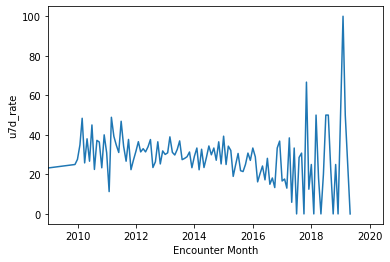

In [167]:
monthly_u7_pcp = readm_pcp_new.groupby(pd.Grouper(key = 'Encounter Start Date',freq='M'))['PCP Under 7 Days'].sum()
monthly_u7_pcp = pd.DataFrame({'Encounter Month':monthly_u7_pcp.index, 'Under 7 Days Count':monthly_u7_pcp.values})


monthly_encounters = readmissions.groupby(pd.Grouper(key = 'Encounter Start Date',freq='M'))['Encounter ID'].count()
monthly_encounters = pd.DataFrame({'Encounter Month': monthly_encounters.index, 'Encounters Count': monthly_encounters.values})

monthly_u7_rates = pd.merge(monthly_encounters, monthly_u7_pcp, how = 'inner')

monthly_u7_rates['u7d_rate'] = 100*monthly_u7_rates['Under 7 Days Count'] / monthly_u7_rates['Encounters Count']

print(monthly_u7_rates)

g = sns.lineplot(x = 'Encounter Month', y = 'u7d_rate', data = monthly_u7_rates)
g.set(xlim = (pd.to_datetime('2008-12-31'),None))

# Problem 3
## Part A: Does 30-day readmission rate vary by hospital?

In [168]:
# For each facility NPI, calculate a sum of readmissions within 30 days
# divided by the number of admissions to that facility NPI
facility_u30_ct = readmissions.groupby('Facility Provider NPI', as_index = False)['Under 30 Days'].sum()
encounters_by_facility = readmissions.groupby('Facility Provider NPI', as_index = False)['Encounter ID'].count()

facility_u30 = pd.merge(encounters_by_facility, facility_u30_ct, how = 'left')

facility_u30['Facility U30 Days Rate'] = 100*facility_u30['Under 30 Days']/facility_u30['Encounter ID']
facility_u30
facility_u30.sort_values('Under 30 Days', ascending = False)
facility_u30['Encounter ID'].sum()

6213

### Note to self: Go back to beginning and make the NPI columns categories

## Part B: Does 30-day readmission rate vary by hospital physician?

In [169]:
att_u30_ct = readmissions.groupby('Attending Provider NPI', as_index = False)['Under 30 Days'].sum()
encounters_by_att = readmissions.groupby('Attending Provider NPI', as_index = False)['Encounter ID'].count()

att_u30 = pd.merge(encounters_by_att, att_u30_ct, how = 'left')

att_u30['Attending Provider U30 Days Rate'] = 100*att_u30['Under 30 Days']/att_u30['Encounter ID']
att_u30
att_u30.sort_values('Encounter ID', ascending = False)
att_u30['Encounter ID'].sum()

5884

## Part C: Does 7-day follow-up rate vary by group PCP?

In [170]:
pcp_u7_by_group = readm_pcp_new.groupby('Provider Group NPI', as_index = False)['PCP Under 7 Days'].sum()
encounters_by_pcp_group = readm_pcp_new.groupby('Provider Group NPI', as_index = False)['Encounter ID'].count()

pcp_group_u7 = pd.merge(encounters_by_pcp_group, pcp_u7_by_group, how = 'left')

pcp_group_u7['PCP Group U7 Days Rate'] = 100*pcp_group_u7['PCP Under 7 Days']/pcp_group_u7['Encounter ID']
pcp_group_u7
pcp_group_u7.sort_values("PCP Under 7 Days", ascending = False)
print(pcp_group_u7['Encounter ID'].sum())

4840


## Part D: Does 7-day follow-up rate vary by PCP physician?

In [171]:
pcp_u7_by_provider = readm_pcp_new.groupby('Service Provider NPI', as_index = False)['PCP Under 7 Days'].sum()
encounters_by_pcp_provider = readm_pcp_new.groupby('Service Provider NPI', as_index = False)['Encounter ID'].count()

pcp_provider_u7 = pd.merge(encounters_by_pcp_provider, pcp_u7_by_provider, how = 'left')

pcp_provider_u7['PCP Provider U7 Days Rate'] = 100*pcp_provider_u7['PCP Under 7 Days']/pcp_provider_u7['Encounter ID']
pcp_provider_u7.sort_values("Encounter ID", ascending = False)

,Service Provider NPI,Encounter ID,PCP Under 7 Days,PCP Provider U7 Days Rate
1266,14884337,66,41,62.121212
1654,161996,52,18,34.615385
1178,14676430,50,28,56.000000
2775,19724856,50,12,24.000000
605,1285645648,49,18,36.734694
...,...,...,...,...
1217,1477847531,0,0,NaN
1219,1477948479,0,0,NaN
1220,14839778,0,0,NaN
1221,14841212,0,0,NaN


In [172]:
encounters_by_pcp_provider.sum()

Encounter ID    4926
dtype: int64